<a href="https://colab.research.google.com/github/J-Neff/MAT421/blob/main/Module_B_Section_17_4%2C_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

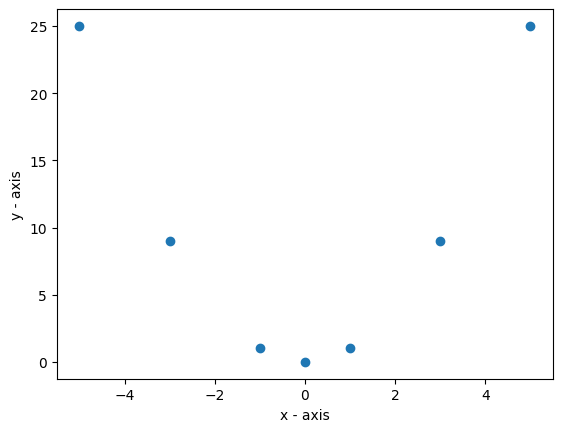

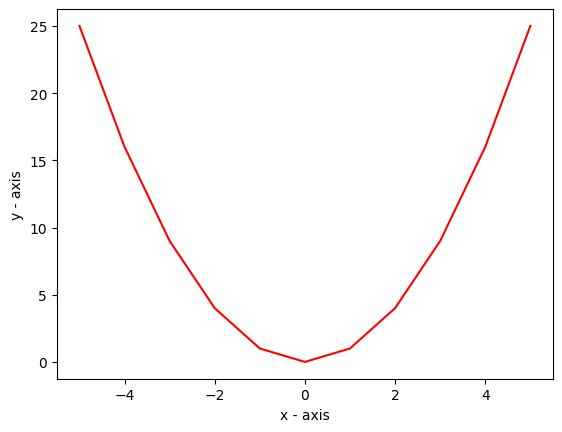

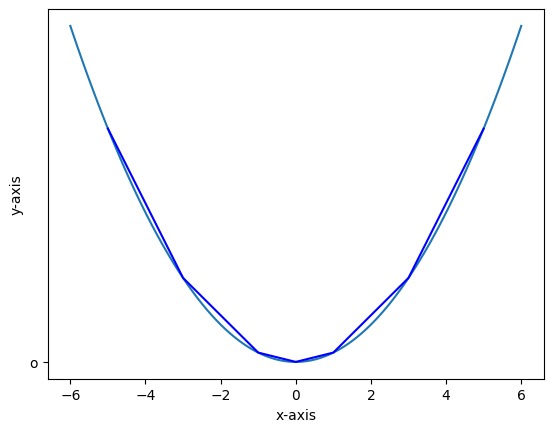

In [7]:
import matplotlib.pyplot as plt
import numpy as np
#These points form the basis for the quadratic equation y=x^2, but only shows the defined points of the equation, not the smooth curve of a quadratic.
x = [-5, -3, -1, 0, 1, 3, 5]
y = [25,9, 1, 0, 1, 9, 25]
plt.plot(x, y, 'o')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.show()

#Lagrange Polynomial Interpolation
#Lagrange polynomial is constructed by taking a weighted sum of terms, each term corresponding to one of the data points.
from scipy.interpolate import lagrange
f = lagrange(x, y)
x1 = np.arange(-5, 6)
y1 = f(x1)
plt.plot(x1, y1,'r')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.show()

#Newton’s Polynomial Interpolation
def newton(x,y):
  n = len(x)
  #Construct table and load xy pairs in first columns
  A = np.zeros((n,n+1))
  A[:,0]= x[:]
  A[:,1]= y[:]
  #Fill in Divided differences
  for j in range(2,n+1):
    for i in range(j-1,n):
      A[i,j] = (A[i,j-1]-A[i-1,j-1]) / (A[i,0]-A[i-j+1,0])
  #Copy diagonal elements into array for returning
  p = np.zeros(n)
  for k in range(0,n):
    p[k] = A[k,k+1]
  return p
#Evaluates polynomial at ’t’ given x-values and coefficients
def poly(t,x,p):
  n = len(x)
  out = p[n-1]
  for i in range(n-2,-1,-1):
    out = out*(t-x[i]) + p[i]
  return out
#Calculates correct coefficients and graphs interpolating polynomial
a = newton(x,y)
tval = np.linspace(min(x)-1,max(x)+1,100)
yval = poly(tval,x,a)
plt.plot(tval,yval)
#Annotates graph and plots points used for interpolation
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,y,'blue','o','')